In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load the dataset

In [26]:
Ds1 = pd.read_csv(r"C:\Users\Anuja Verma\Downloads\housing_data.csv")
Ds1.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [27]:
### Display Dataset

In [28]:
Ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
### 5. Feature Engineering ###

In [11]:
# Price per Square Foot

In [12]:
Ds1['Price_per_SqFt'] = Ds1['SalePrice'] / Ds1['TotalBsmtSF']
Ds1.isnull().sum()[Ds1.isnull().sum()>0]

Alley          1369
MasVnrType      872
Electrical        1
GarageYrBlt      81
dtype: int64

In [13]:
#Property Age

In [14]:
current_year = 2023  # Update this to the current year
Ds1['Property_Age'] = current_year - Ds1['YearBuilt']

In [15]:
#Total Rooms 

In [16]:
Ds1['Total_Rooms'] = Ds1['BedroomAbvGr'] + Ds1['FullBath'] + Ds1['HalfBath'] + Ds1['TotRmsAbvGrd']

In [17]:
#Lot Size to Living Space Ratio
# Assuming 'lot_size' is a column in your DataFrame

In [69]:
Ds1['lot_to_living_ratio'] = Ds1['LotArea'] / Ds1['1stFlrSF']

In [70]:
# Neighborhood Average Price
# Assuming 'neighborhood' is a column in your DataFrame

In [71]:
Ds1['neighborhood_avg_price'] = Ds1.groupby('Neighborhood')['SalePrice'].transform('mean')

In [72]:
#Seasonal Effects
##Featur# Assuming 'date' is a column in your DataFrame

In [73]:
Ds1['month'] = pd.to_datetime(Ds1['YearBuilt']).dt.month
Ds1['season'] = (Ds1['month'] % 12 + 3) // 3  # 1: Spring, 2: Summer, 3: Fall, 4: Wintere Engineering ###

In [30]:
#Feature Selection 

x = Ds1.drop(['SalePrice',],axis = 1)
y = Ds1['SalePrice']

print(x.shape,y.shape)

(1460, 80) (1460,)


In [74]:
#Garage Size
# Assuming 'garage_size' is a column in your DataFrame

In [84]:
Ds1['garage_size'] = Ds1['GarageYrBlt'].fillna(0)  # Fill NaN with 0 if no garage


In [ ]:
### 6.Feature Engineering and Size Impact ###

In [ ]:
#Relationship between Square Footage and House Prices

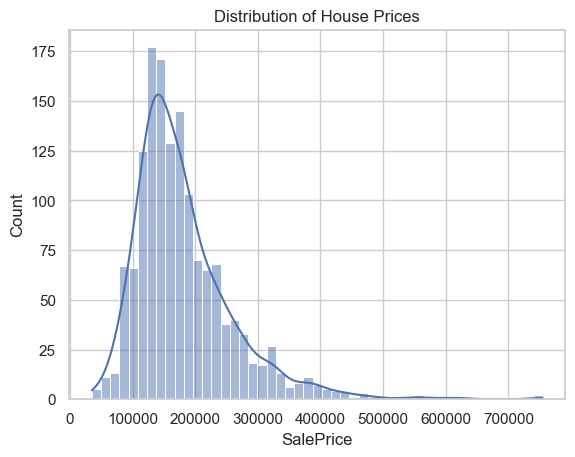

In [92]:
# Univariate Analysis
sns.histplot(Ds1['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

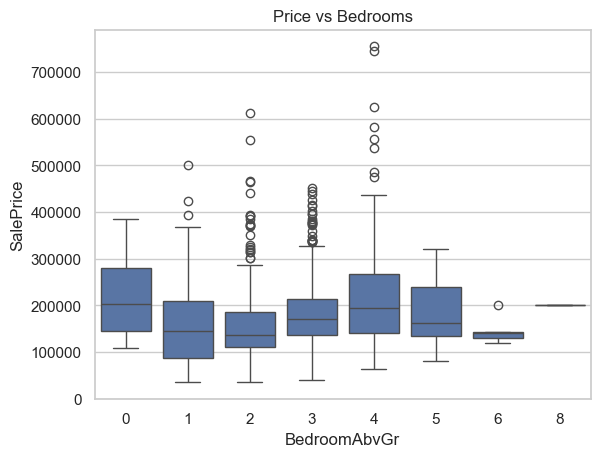

In [96]:
# Boxplot to see price variation with bedrooms
sns.boxplot(x ='BedroomAbvGr', y='SalePrice', data=Ds1)
plt.title('Price vs Bedrooms')
plt.show()

<Axes: xlabel='BedroomAbvGr'>

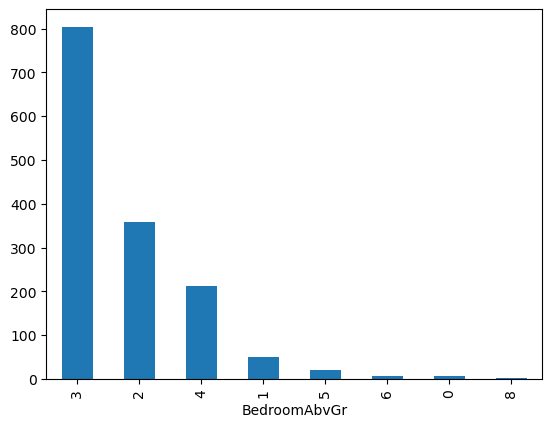

In [19]:
Ds1['BedroomAbvGr'].value_counts().plot( kind = 'bar')

<Axes: xlabel='GarageCars'>

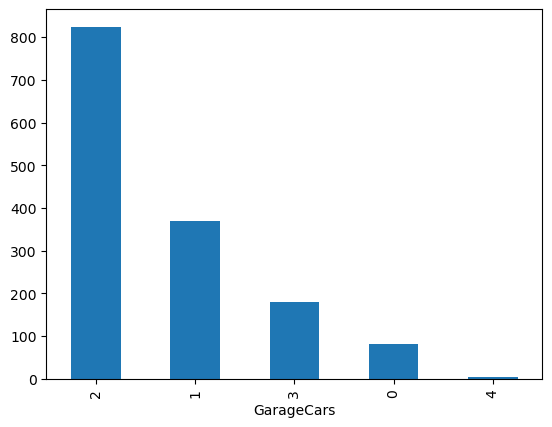

In [22]:
Ds1['GarageCars'].value_counts().plot( kind = 'bar')

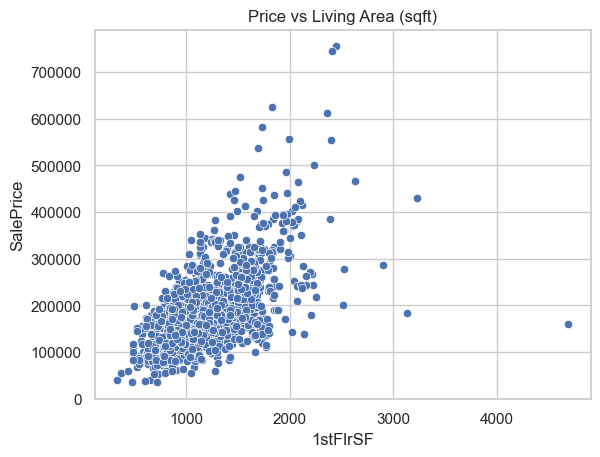

In [103]:
# Scatter plot for sqft_living vs price
sns.scatterplot(x='1stFlrSF' , y='SalePrice', data=Ds1)
plt.title('Price vs Living Area (sqft)')
plt.show()

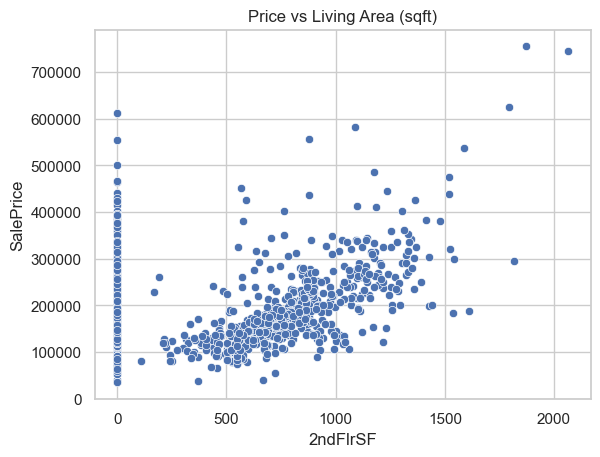

In [104]:
# Scatter plot for sqft_living vs price
sns.scatterplot(x='2ndFlrSF' , y='SalePrice', data=Ds1)
plt.title('Price vs Living Area (sqft)')
plt.show()

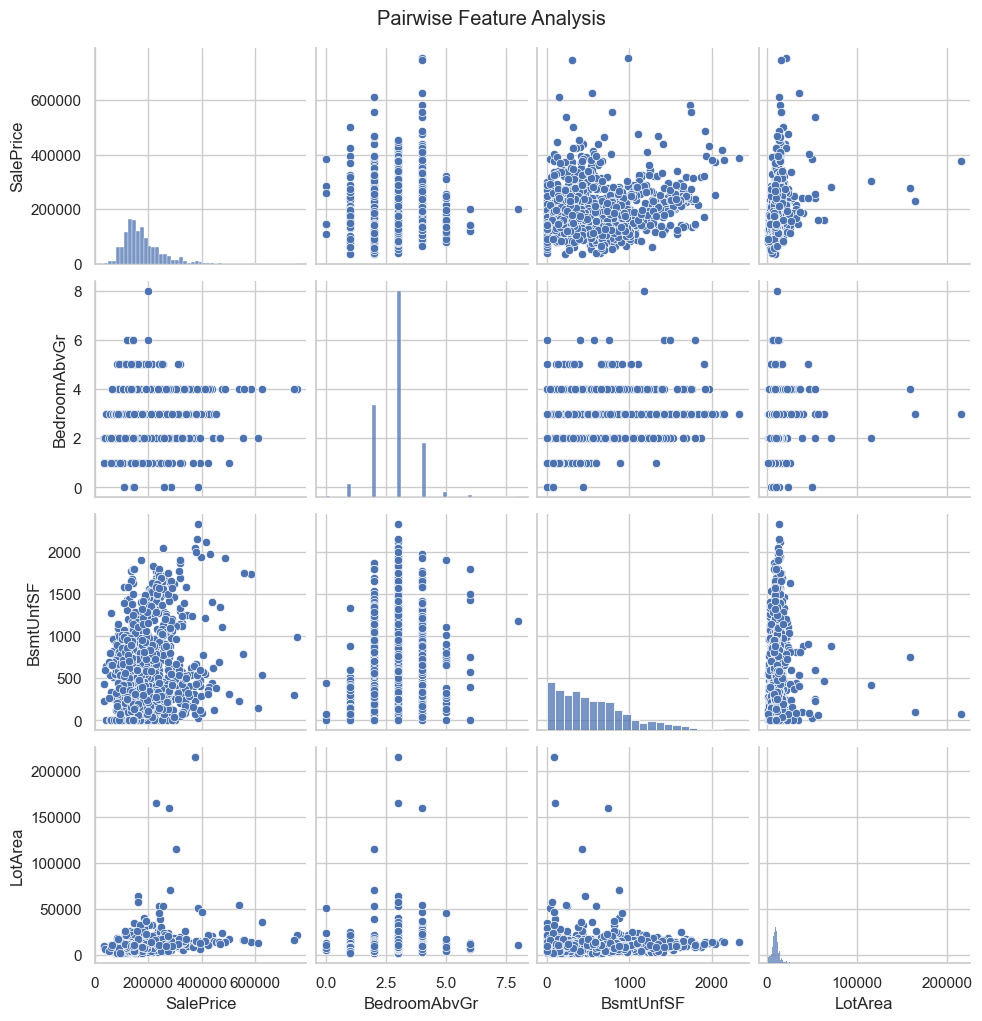

In [117]:
# Pairplot for selected features
sns.pairplot(Ds1[['SalePrice', 'BedroomAbvGr', 'BsmtUnfSF', 'sqft_living']])
plt.suptitle("Pairwise Feature Analysis", y=1.02)
plt.show()

In [ ]:
###7. Market Trends and Historical Pricing ###

In [131]:
# Aggregate average price by month

monthly_price = Ds1.groupby('YearBuilt')['SalePrice'].mean().reset_index()
monthly_price['year_month'] = monthly_price['YearBuilt'].astype(str)

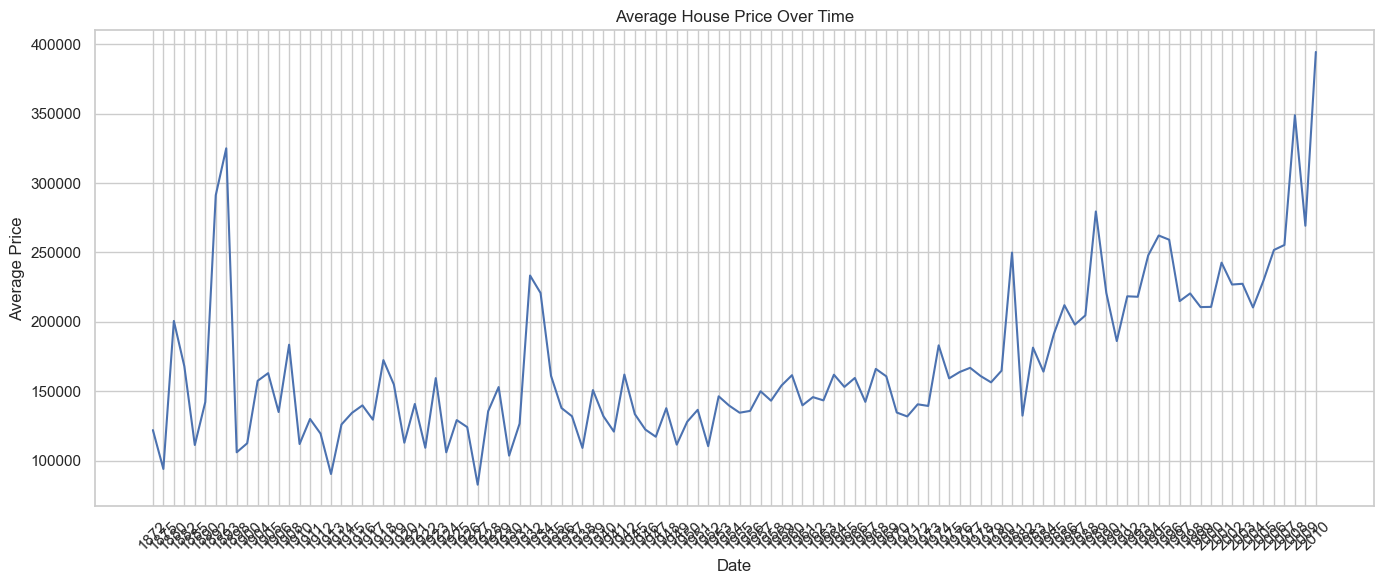

In [133]:
# Plot the pricing trend
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_price, x='year_month', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Average House Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [134]:
# Optional: Rolling average (e.g., 3-month moving average)
monthly_price['rolling_avg'] = monthly_price['SalePrice'].rolling(window=3).mean()


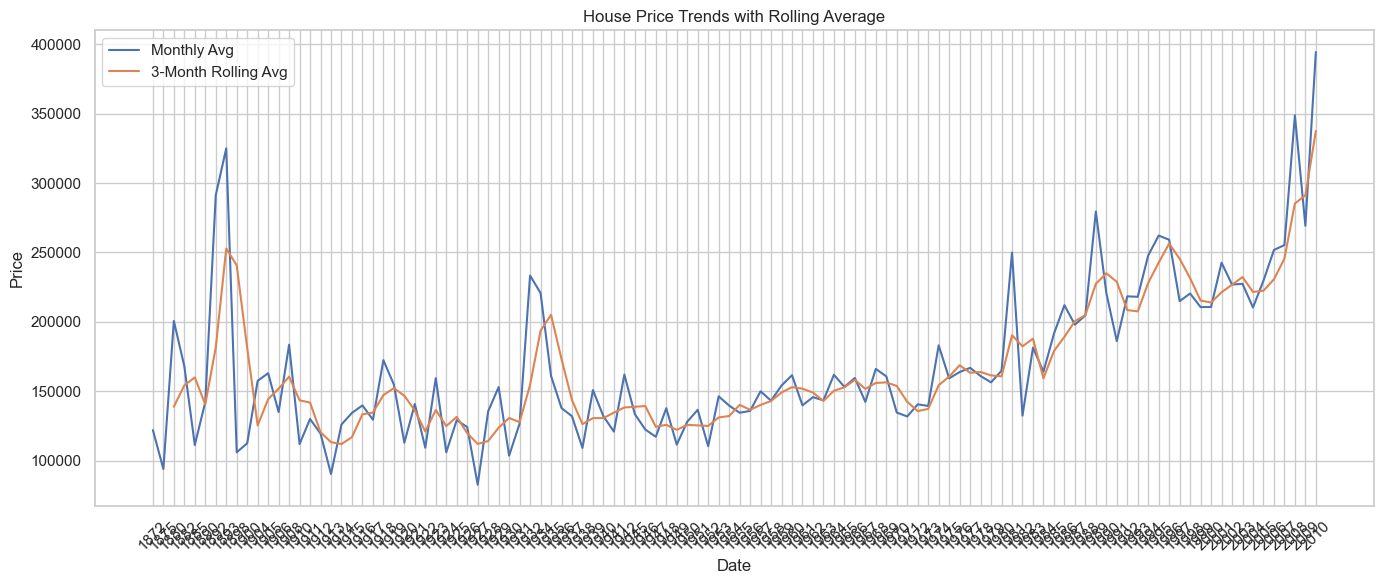

In [135]:
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_price, x='year_month', y='SalePrice', label='Monthly Avg')
sns.lineplot(data=monthly_price, x='year_month', y='rolling_avg', label='3-Month Rolling Avg')
plt.xticks(rotation=45)
plt.title('House Price Trends with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### 8. Customer Preferences and Amenities ###

In [142]:
# Convert binary/categorical flags for clarity (optional)
Ds1['waterfront'] = Ds1['FullBath'].apply(lambda x: 'Yes' if x == 1 else 'No')
Ds1['has_pool'] = Ds1['PoolArea'].apply(lambda x: 'Yes' if x == 1 else 'No')  # if 'pool' exists
Ds1['has_garage'] = Ds1['GarageArea'].apply(lambda x: 'Yes' if x > 0 else 'No')  # assuming 'garage' is num of cars

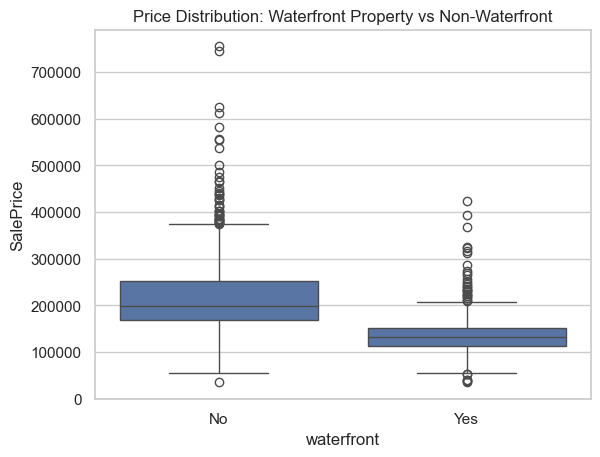

In [143]:
# Boxplot: Price vs Waterfront
sns.boxplot(x='waterfront', y='SalePrice', data= Ds1)
plt.title('Price Distribution: Waterfront Property vs Non-Waterfront')
plt.show()


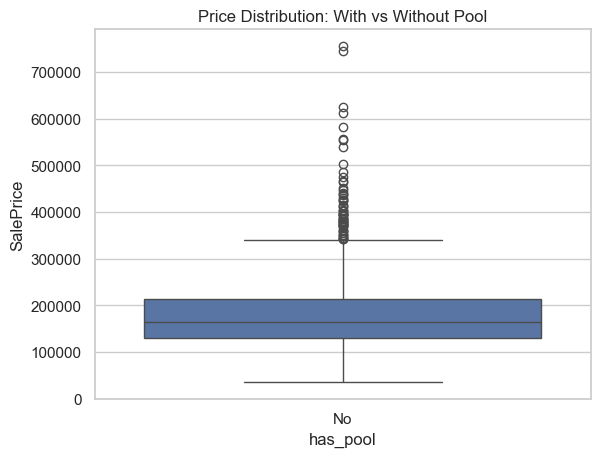

In [144]:
# Boxplot: Price vs Pool
sns.boxplot(x='has_pool', y='SalePrice', data=Ds1)
plt.title('Price Distribution: With vs Without Pool')
plt.show()


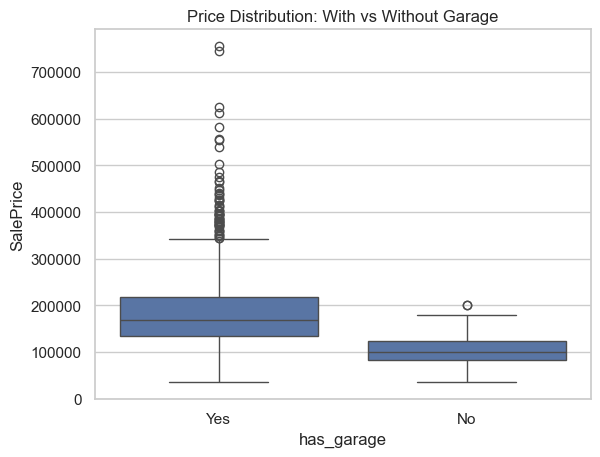

In [145]:
# Boxplot: Price vs Garage
sns.boxplot(x='has_garage', y='SalePrice', data=Ds1)
plt.title('Price Distribution: With vs Without Garage')
plt.show()

In [148]:
# Multiple amenity comparison
amenities = ['waterfront', 'has_pool', 'has_garage']
avg_prices = Ds1.groupby(amenities)['SalePrice'].mean().reset_index()


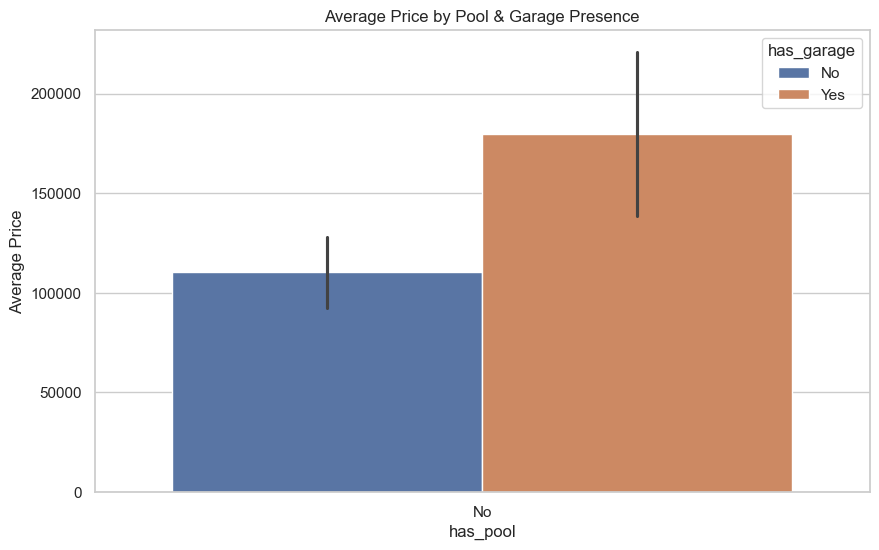

In [150]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_prices, x='has_pool', y='SalePrice', hue='has_garage')
plt.title('Average Price by Pool & Garage Presence')
plt.ylabel('Average Price')
plt.show()